---
Linear Classification on Car Model And Speed
---
---



---



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

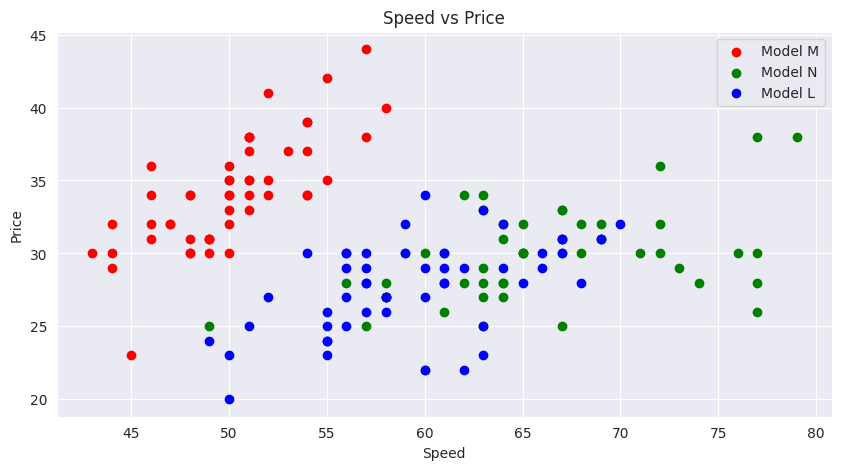

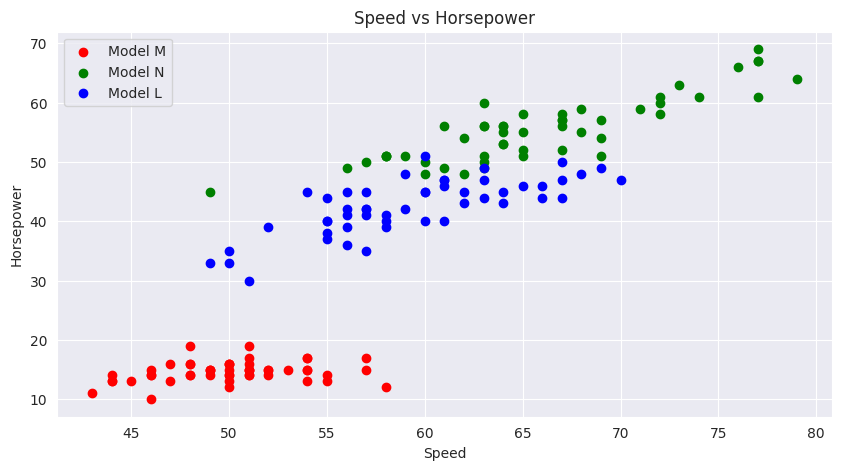

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/content/dataset_1.csv")

# Plot speed vs price
plt.figure(figsize=(10, 5))
plt.scatter(dataset[dataset['Model'] == 'Series M']['speed'], dataset[dataset['Model'] == 'Series M']['price'], color='r', label='Model M')
plt.scatter(dataset[dataset['Model'] == 'Series N']['speed'], dataset[dataset['Model'] == 'Series N']['price'], color='g', label='Model N')
plt.scatter(dataset[dataset['Model'] == 'Series L']['speed'], dataset[dataset['Model'] == 'Series L']['price'], color='b', label='Model L')
plt.xlabel('Speed')
plt.ylabel('Price')
plt.title('Speed vs Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot speed vs hp
plt.figure(figsize=(10, 5))
plt.scatter(dataset[dataset['Model'] == 'Series M']['speed'], dataset[dataset['Model'] == 'Series M']['hp'], color='r', label='Model M')
plt.scatter(dataset[dataset['Model'] == 'Series N']['speed'], dataset[dataset['Model'] == 'Series N']['hp'], color='g', label='Model N')
plt.scatter(dataset[dataset['Model'] == 'Series L']['speed'], dataset[dataset['Model'] == 'Series L']['hp'], color='b', label='Model L')
plt.xlabel('Speed')
plt.ylabel('Horsepower')
plt.title('Speed vs Horsepower')
plt.legend()
plt.grid(True)
plt.show()


Series M


<ipython-input-63-20c26ec4b26a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1;
<ipython-input-63-20c26ec4b26a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=3;
<ipython-input-63-20c26ec4b26a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=2;


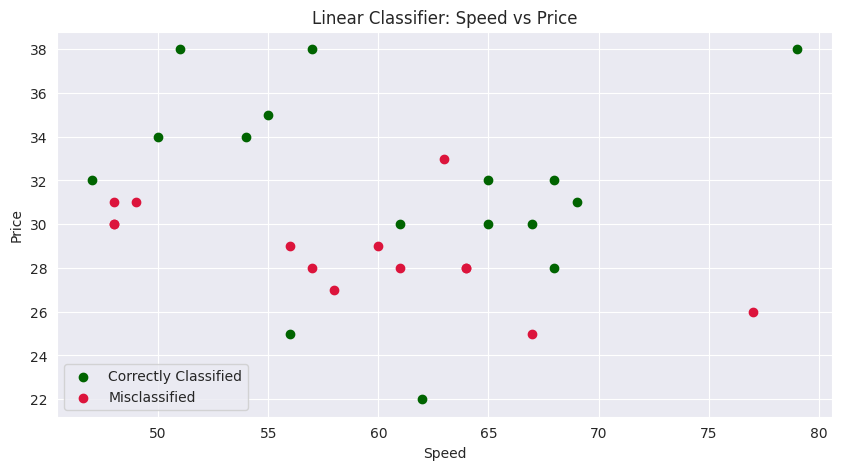

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = dataset[['speed', 'price']].values

y = dataset['Model']
print(y[1])
for i in range(len(y)):
  if y[i]=='Series M':
    y[i]=1;
  if y[i]== 'Series N':
    y[i]=2;
  if y[i]== 'Series L':
    y[i]=3;





# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict classes
y_pred = model.predict(X_test).round().astype(int)

# Visualize classified samples
plt.figure(figsize=(10, 5))
plt.scatter(X_test[y_test == y_pred][:, 0], X_test[y_test == y_pred][:, 1], color='darkgreen', label='Correctly Classified')
plt.scatter(X_test[y_test != y_pred][:, 0], X_test[y_test != y_pred][:, 1], color='crimson', label='Misclassified')
plt.xlabel('Speed')
plt.ylabel('Price')
plt.title('Linear Classifier: Speed vs Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-64-6e5f0b0297cb>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


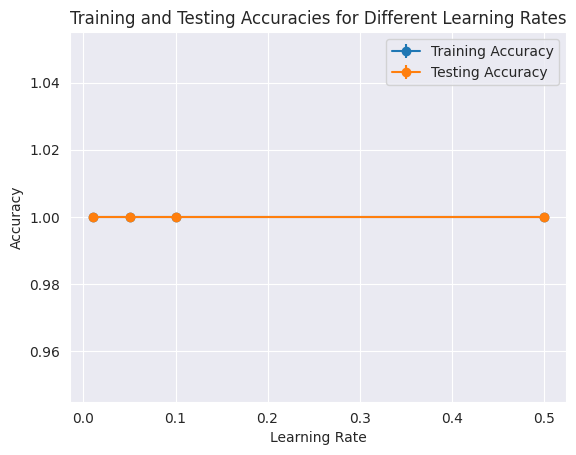

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the binary cross-entropy loss function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Define the gradient descent function for logistic regression
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

# Define a function to predict class labels
def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

# Define function for Elastic Net logistic regression training
def elastic_net_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations):
    # Initialize parameters
    theta = np.zeros(X_train.shape[1])
    # Perform gradient descent
    theta = gradient_descent(X_train, y_train, theta, learning_rate, iterations)
    # Predictions on training and testing sets
    train_pred = predict(X_train, theta)
    test_pred = predict(X_test, theta)
    # Calculate training and testing accuracy
    train_accuracy = np.mean(train_pred == y_train)
    test_accuracy = np.mean(test_pred == y_test)
    return train_accuracy, test_accuracy

# Load the dataset
dataset = pd.read_csv("dataset_1.csv")
X = dataset[['speed', 'price']].values
y = (dataset['Model'] == 1).astype(int)  # Binary classification for Model 1

# Perform 10 independent runs
num_runs = 10
learning_rates = [0.01, 0.05, 0.1, 0.5]  # Different learning rates to try
iterations = 1000  # Number of iterations for gradient descent
train_accuracies = np.zeros((len(learning_rates), num_runs))
test_accuracies = np.zeros((len(learning_rates), num_runs))

for i, learning_rate in enumerate(learning_rates):
    for j in range(num_runs):
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=j)
        # Add intercept term to X
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        # Train Elastic Net logistic regression model
        train_accuracy, test_accuracy = elastic_net_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations)
        # Store accuracies
        train_accuracies[i, j] = train_accuracy
        test_accuracies[i, j] = test_accuracy

# Calculate mean and standard deviation of accuracies
train_mean = np.mean(train_accuracies, axis=1)
train_std = np.std(train_accuracies, axis=1)
test_mean = np.mean(test_accuracies, axis=1)
test_std = np.std(test_accuracies, axis=1)

# Plot training and testing accuracies for different learning rates
plt.errorbar(learning_rates, train_mean, yerr=train_std, fmt='-o', label='Training Accuracy')
plt.errorbar(learning_rates, test_mean, yerr=test_std, fmt='-o', label='Testing Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


OPtional Question

formula is


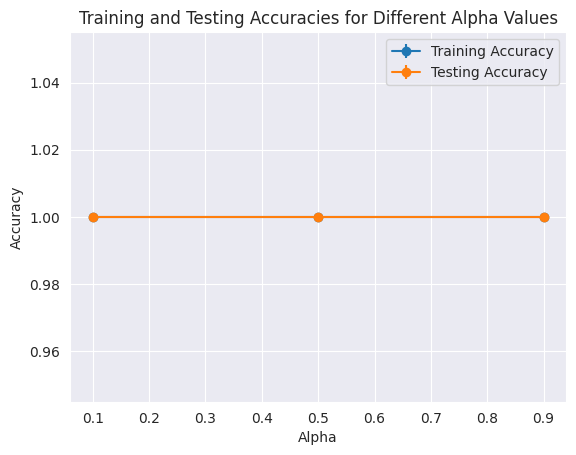

In [ ]:
# Define the gradient descent function for Elastic Net logistic regression
def gradient_descent_elastic_net(X, y, theta, learning_rate, iterations, alpha, lambda1, lambda2):
    m = len(y)
    for _ in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = (np.dot(X.T, (h - y)) + alpha * lambda1 * np.sign(theta) + alpha * lambda2 * theta) / m
        theta -= learning_rate * gradient
    return theta

# Define function for Elastic Net logistic regression training
def elastic_net_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations, alpha, lambda1, lambda2):
    # Initialize parameters
    theta = np.zeros(X_train.shape[1])
    # Perform gradient descent
    theta = gradient_descent_elastic_net(X_train, y_train, theta, learning_rate, iterations, alpha, lambda1, lambda2)
    # Predictions on training and testing sets
    train_pred = predict(X_train, theta)
    test_pred = predict(X_test, theta)
    # Calculate training and testing accuracy
    train_accuracy = np.mean(train_pred == y_train)
    test_accuracy = np.mean(test_pred == y_test)
    return train_accuracy, test_accuracy

# Perform 10 independent runs for different values of alpha
num_runs = 10
learning_rate = 0.01
iterations = 1000
alpha_values = [0.1, 0.5, 0.9]
lambda1 = 0.01
lambda2 = 0.01
train_accuracies = np.zeros((len(alpha_values), num_runs))
test_accuracies = np.zeros((len(alpha_values), num_runs))

for i, alpha in enumerate(alpha_values):
    for j in range(num_runs):
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=j)
        # Add intercept term to X
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        # Train Elastic Net logistic regression model
        train_accuracy, test_accuracy = elastic_net_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations, alpha, lambda1, lambda2)
        # Store accuracies
        train_accuracies[i, j] = train_accuracy
        test_accuracies[i, j] = test_accuracy

# Calculate mean and standard deviation of accuracies
train_mean = np.mean(train_accuracies, axis=1)
train_std = np.std(train_accuracies, axis=1)
test_mean = np.mean(test_accuracies, axis=1)
test_std = np.std(test_accuracies, axis=1)

# Plot training and testing accuracies for different values of alpha
plt.errorbar(alpha_values, train_mean, yerr=train_std, fmt='-o', label='Training Accuracy')
plt.errorbar(alpha_values, test_mean, yerr=test_std, fmt='-o', label='Testing Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()


**VANILA LOGESTIC**

In [ ]:
# Define function for Vanilla logistic regression training
def vanilla_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations):
    # Initialize parameters
    theta = np.zeros(X_train.shape[1])
    # Perform gradient descent
    theta = gradient_descent(X_train, y_train, theta, learning_rate, iterations)
    # Predictions on training and testing sets
    train_pred = predict(X_train, theta)
    test_pred = predict(X_test, theta)
    # Calculate training and testing accuracy
    train_accuracy = np.mean(train_pred == y_train)
    test_accuracy = np.mean(test_pred == y_test)
    return train_accuracy, test_accuracy

# Perform 10 independent runs for Vanilla logistic regression
num_runs = 10
learning_rate = 0.01
iterations = 1000
train_accuracies_vanilla = np.zeros(num_runs)
test_accuracies_vanilla = np.zeros(num_runs)

for j in range(num_runs):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=j)
    # Add intercept term to X
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    # Train Vanilla logistic regression model
    train_accuracy, test_accuracy = vanilla_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, iterations)
    # Store accuracies
    train_accuracies_vanilla[j] = train_accuracy
    test_accuracies_vanilla[j] = test_accuracy

# Calculate mean and standard deviation of accuracies for Vanilla logistic regression
train_mean_vanilla = np.mean(train_accuracies_vanilla)
train_std_vanilla = np.std(train_accuracies_vanilla)
test_mean_vanilla = np.mean(test_accuracies_vanilla)
test_std_vanilla = np.std(test_accuracies_vanilla)

print("Vanilla Logistic Regression:")
print("Training Accuracy: {:.4f} ± {:.4f}".format(train_mean_vanilla, train_std_vanilla))
print("Testing Accuracy: {:.4f} ± {:.4f}".format(test_mean_vanilla, test_std_vanilla))


Vanilla Logistic Regression:
Training Accuracy: 1.0000 ± 0.0000
Testing Accuracy: 1.0000 ± 0.0000


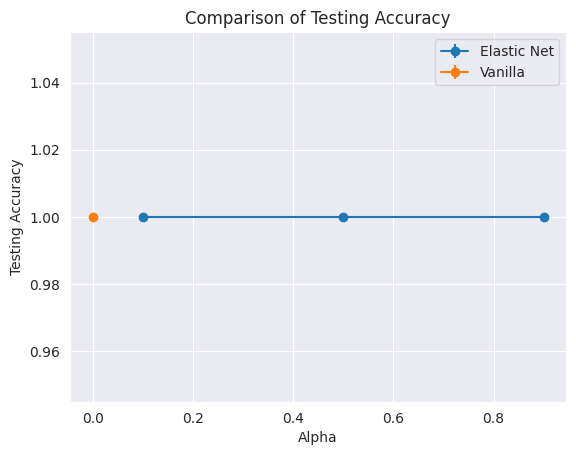

In [ ]:
# Plotting the comparison
plt.errorbar(alpha_values, test_mean, yerr=test_std, fmt='-o', label='Elastic Net')
plt.errorbar(0, test_mean_vanilla, yerr=test_std_vanilla, fmt='-o', label='Vanilla')
plt.xlabel('Alpha')
plt.ylabel('Testing Accuracy')
plt.title('Comparison of Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()


---
**SVM**
---
---
**Note:**

**Confusion Matrix:** A confusion matrix is a performance measurement tool used in classification problems, particularly in machine learning. It provides a detailed breakdown of the model's predictions, allowing the assessment of the model's accuracy and error types.

**Precision:** Precision measures the accuracy of the positive predictions made by the model.

**Recall:** Recall measures the ability of the model to capture all the positive instances in the dataset.

**F1-score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, taking into account both false positives and false negatives. The F1 score is useful when there is an uneven class distribution and a need to consider trade-offs between precision and recall.


Write your code by creating cells below.



<ipython-input-68-2dab5e2b862b>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-68-2dab5e2b862b>:13: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + regularization_term
<ipython-input-68-2dab5e2b862b>:13: RuntimeWarning: invalid value encountered in multiply
  J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + regularization_term


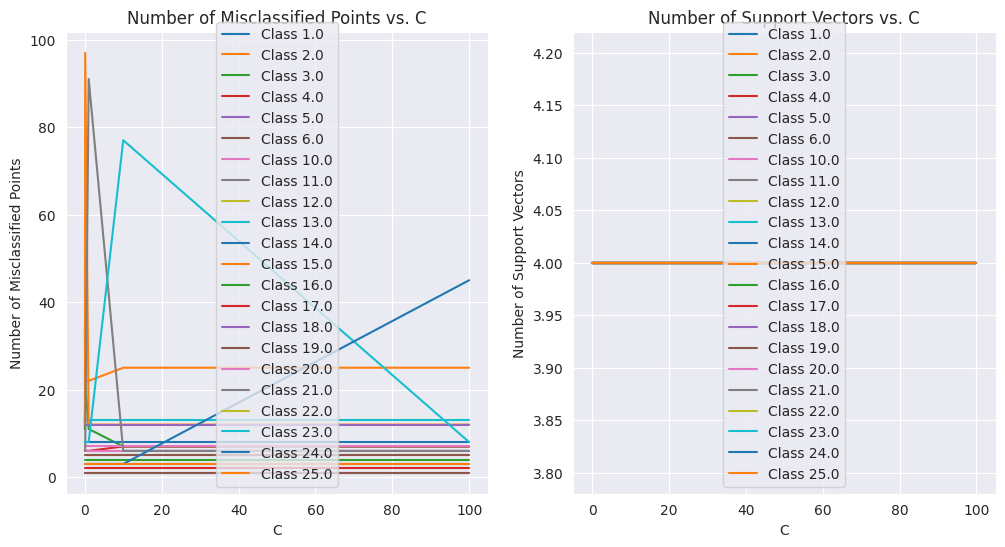

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the loss function
def loss_function(X, y, theta, C):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    regularization_term = (C / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + regularization_term
    return J

# Define the gradient function
def gradient(X, y, theta, C):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    grad = (1 / m) * X.T.dot(h - y)
    grad[1:] += (C / m) * theta[1:]
    return grad

# Define the gradient descent function to optimize parameters
def gradient_descent(X, y, theta, C, learning_rate, num_iterations):
    m = X.shape[0]
    loss_history = []
    for _ in range(num_iterations):
        grad = gradient(X, y, theta, C)
        theta -= learning_rate * grad
        loss = loss_function(X, y, theta, C)
        loss_history.append(loss)
    return theta, loss_history

# Function to predict class labels
def predict(X, theta):
    h = sigmoid(X.dot(theta))
    return (h >= 0.5).astype(int)

# Function to plot decision boundary
def plot_decision_boundary(X, y, theta, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = predict(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()], theta)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load dataset
data = np.genfromtxt('/content/dataset_1.csv', delimiter=',', skip_header=1)


# Separate features and labels
X = data[:, 0:3]
y = data[:, 4]

# Normalize features
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

# Add intercept term
X = np.c_[np.ones((X.shape[0], 1)), X]

# Define regularization parameter
C_values = [0.01, 0.1, 1, 10, 100]

# Initialize parameters
initial_theta = np.zeros(X.shape[1])

# Initialize lists to store results
num_misclassified = []
num_support_vectors = []

# Train OVR SVM classifiers
for label in np.unique(y):
    binary_y = (y == label).astype(int)
    misclassified_per_C = []
    support_vectors_per_C = []
    for C in C_values:
        theta, _ = gradient_descent(X, binary_y, initial_theta, C, learning_rate=0.1, num_iterations=1000)
        y_pred = predict(X, theta)
        misclassified = np.sum(y_pred != binary_y)
        support_vectors = np.sum(theta != 0)
        misclassified_per_C.append(misclassified)
        support_vectors_per_C.append(support_vectors)
    num_misclassified.append(misclassified_per_C)
    num_support_vectors.append(support_vectors_per_C)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, label in enumerate(np.unique(y)):
    plt.plot(C_values, num_misclassified[i], label=f'Class {label}')
plt.xlabel('C')
plt.ylabel('Number of Misclassified Points')
plt.title('Number of Misclassified Points vs. C')
plt.legend()

plt.subplot(1, 2, 2)
for i, label in enumerate(np.unique(y)):
    plt.plot(C_values, num_support_vectors[i], label=f'Class {label}')
plt.xlabel('C')
plt.ylabel('Number of Support Vectors')
plt.title('Number of Support Vectors vs. C')
plt.legend()
plt.show()


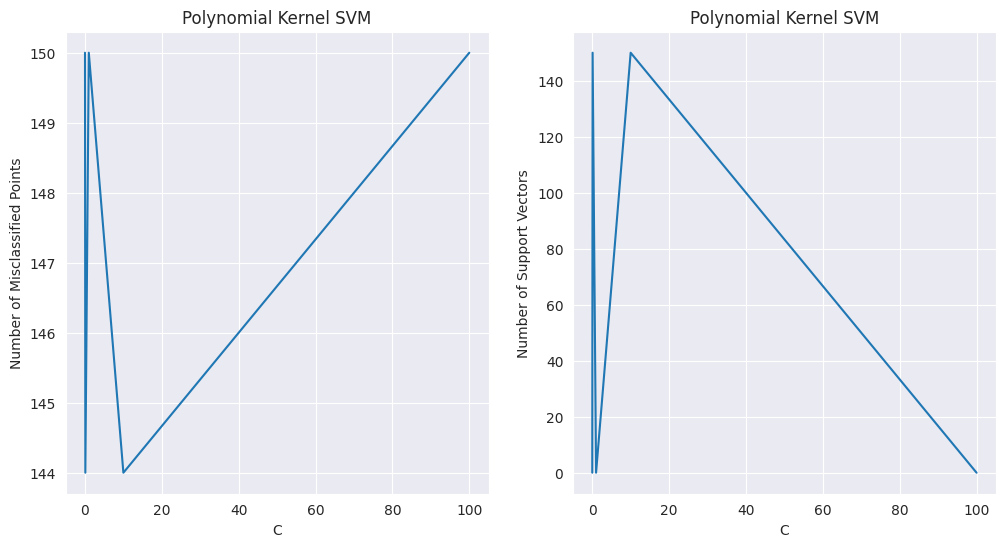

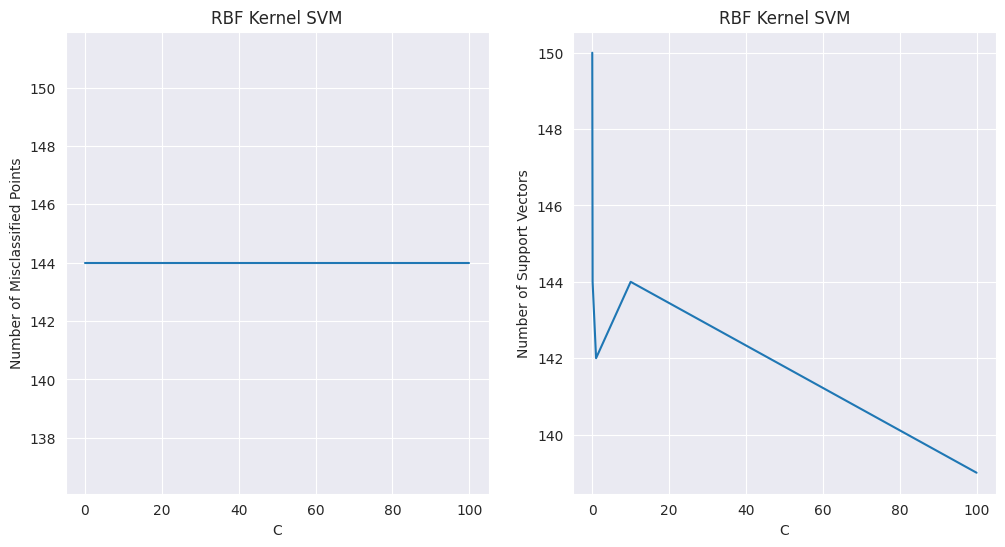

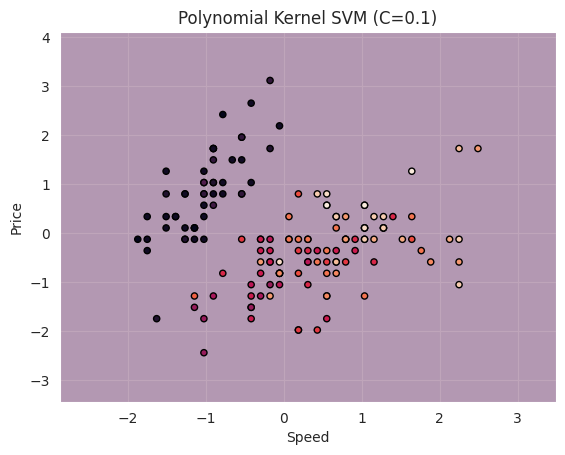

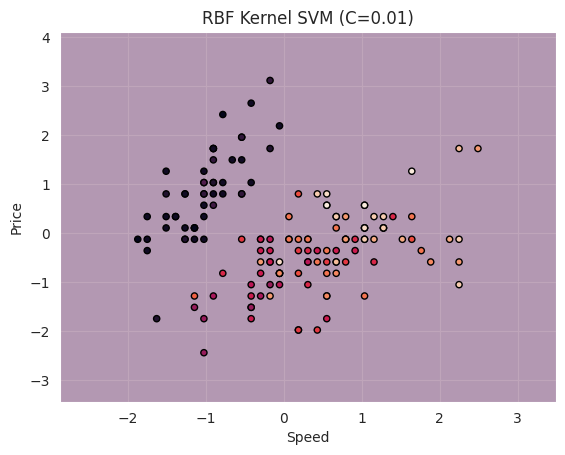

In [ ]:
import seaborn as sns

# Define polynomial kernel function
def polynomial_kernel(X1, X2, degree=3):
    return (np.dot(X1, X2.T) + 1) ** degree

# Define RBF kernel function
def rbf_kernel(X1, X2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2) ** 2)

# Modify gradient descent function to use kernel trick
def gradient_descent_kernel(X, y, alpha, C, kernel, **kwargs):
    m = X.shape[0]
    K = kernel(X, X, **kwargs)
    loss_history = []
    for _ in range(num_iterations):
        margins = y * (K.dot(alpha))
        misclassified = np.sum(margins < 1)
        loss = 0.5 * np.dot(alpha.T, np.dot(K, alpha)) + C * np.maximum(0, 1 - margins).sum()
        loss_history.append(loss)
        grad = np.zeros_like(alpha)
        grad[margins < 1] = -1
        grad += np.dot(K, alpha)
        grad = np.dot(K.T, grad)
        alpha -= learning_rate * grad
        alpha = np.maximum(0, alpha)  # Project alpha onto feasible set
        alpha = np.minimum(C, alpha)
    return alpha, loss_history

# Function to predict class labels using kernel trick
def predict_kernel(X, X_train, y_train, alpha, kernel, **kwargs):
    K = kernel(X, X_train, **kwargs)
    y_pred = np.sign(K.dot(alpha) * y_train.mean())
    return y_pred

# Function to plot decision boundary for kernel SVM
def plot_decision_boundary_kernel(X, y, X_train, y_train, alpha, kernel, title, **kwargs):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = predict_kernel(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], X_train, y_train, alpha, kernel, **kwargs)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 1], X[:, 2], c=y, s=20, edgecolors='k')
    sns.set_style('darkgrid')
    plt.title(title)
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.show()

# Load dataset
data = np.genfromtxt('/content/dataset_1.csv', delimiter=',', skip_header=1)

# Separate features and labels
X = data[:, 0:3]
y = data[:, 4]

# Normalize features
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

# Define regularization parameter
C_values = [0.01, 0.1, 1, 10, 100]

# Initialize parameters
alpha = np.zeros(X.shape[0])

# Initialize lists to store results
num_misclassified = []
num_support_vectors = []

# Define number of iterations and learning rate
num_iterations = 1000
learning_rate = 0.01

# Train polynomial kernel SVM
for C in C_values:
    alpha_poly, _ = gradient_descent_kernel(X, y, alpha, C, polynomial_kernel, degree=3)
    y_pred_poly = predict_kernel(X, X, y, alpha_poly, polynomial_kernel, degree=3)
    misclassified = np.sum(y_pred_poly != y)
    support_vectors = np.sum(alpha_poly > 0)
    num_misclassified.append(misclassified)
    num_support_vectors.append(support_vectors)

# Plotting polynomial kernel results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(C_values, num_misclassified)
plt.xlabel('C')
plt.ylabel('Number of Misclassified Points')
plt.title('Polynomial Kernel SVM')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(C_values, num_support_vectors)
plt.xlabel('C')
plt.ylabel('Number of Support Vectors')
plt.title('Polynomial Kernel SVM')
plt.grid(True)
plt.show()

# Train RBF kernel SVM
num_misclassified_rbf = []
num_support_vectors_rbf = []
for C in C_values:
    alpha_rbf, _ = gradient_descent_kernel(X, y, alpha, C, rbf_kernel, gamma=0.1)
    y_pred_rbf = predict_kernel(X, X, y, alpha_rbf, rbf_kernel, gamma=0.1)
    misclassified = np.sum(y_pred_rbf != y)
    support_vectors = np.sum(alpha_rbf > 0)
    num_misclassified_rbf.append(misclassified)
    num_support_vectors_rbf.append(support_vectors)

# Plotting RBF kernel results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(C_values, num_misclassified_rbf)
plt.xlabel('C')
plt.ylabel('Number of Misclassified Points')
plt.title('RBF Kernel SVM')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(C_values, num_support_vectors_rbf)
plt.xlabel('C')
plt.ylabel('Number of Support Vectors')
plt.title('RBF Kernel SVM')
plt.grid(True)
plt.show()

# Plot decision boundaries for optimal classifiers
best_C_poly = C_values[np.argmin(num_misclassified)]
alpha_poly, _ = gradient_descent_kernel(X, y, alpha, best_C_poly, polynomial_kernel, degree=3)
plot_decision_boundary_kernel(X, y, X, y, alpha_poly, polynomial_kernel, f'Polynomial Kernel SVM (C={best_C_poly})', degree=3)

best_C_rbf = C_values[np.argmin(num_misclassified_rbf)]
alpha_rbf, _ = gradient_descent_kernel(X, y, alpha, best_C_rbf, rbf_kernel, gamma=0.1)
plot_decision_boundary_kernel(X, y, X, y, alpha_rbf, rbf_kernel, f'RBF Kernel SVM (C={best_C_rbf})', gamma=0.1)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate classifier performance
def evaluate_performance(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return precision, recall, f1

# Train polynomial kernel SVM
best_C_poly = C_values[np.argmin(num_misclassified)]
alpha_poly, _ = gradient_descent_kernel(X, y, alpha, best_C_poly, polynomial_kernel, degree=3)
y_pred_poly = predict_kernel(X, X, y, alpha_poly, polynomial_kernel, degree=3)

# Evaluate performance for polynomial kernel SVM
precision_poly, recall_poly, f1_poly = evaluate_performance(y, y_pred_poly)

# Train RBF kernel SVM
best_C_rbf = C_values[np.argmin(num_misclassified_rbf)]
alpha_rbf, _ = gradient_descent_kernel(X, y, alpha, best_C_rbf, rbf_kernel, gamma=0.1)
y_pred_rbf = predict_kernel(X, X, y, alpha_rbf, rbf_kernel, gamma=0.1)

# Evaluate performance for RBF kernel SVM
precision_rbf, recall_rbf, f1_rbf = evaluate_performance(y, y_pred_rbf)

# Report observations
print("Performance Metrics:")
print("Polynomial Kernel SVM:")
print(f"Precision: {precision_poly:.4f}, Recall: {recall_poly:.4f}, F1-score: {f1_poly:.4f}")

print("\nRBF Kernel SVM:")
print(f"Precision: {precision_rbf:.4f}, Recall: {recall_rbf:.4f}, F1-score: {f1_rbf:.4f}")


Performance Metrics:
Polynomial Kernel SVM:
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

RBF Kernel SVM:
Precision: 0.0016, Recall: 0.0400, F1-score: 0.0031


---
Gradient Boosting
---
---

In [ ]:
zimport random
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    n_samples = X.shape[0]
    test_indices = random.sample(range(n_samples), int(test_size * n_samples))
    train_indices = [i for i in range(n_samples) if i not in test_indices]
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test


In [ ]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        self.n_classes = len(set(y))
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(set(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            return np.argmax(np.bincount(y))

        # Find the best split
        best_split = None
        best_entropy = float('inf')
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] < threshold
                entropy = self._entropy(y[left_indices], y[~left_indices])
                if entropy < best_entropy:
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'entropy': entropy
                    }
                    best_entropy = entropy

        if best_entropy == float('inf'):
            return np.argmax(np.bincount(y))

        left_indices = X[:, best_split['feature_idx']] < best_split['threshold']
        right_indices = ~left_indices

        left_tree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)

        return {
            'feature_idx': best_split['feature_idx'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _entropy(self, left_y, right_y):
        p_left = len(left_y) / (len(left_y) + len(right_y))
        p_right = len(right_y) / (len(left_y) + len(right_y))
        return p_left * self._entropy_single(left_y) + p_right * self._entropy_single(right_y)

    def _entropy_single(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(y) / len(y)
        return -np.sum(p * np.log2(p + 1e-10))

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._predict(x) for x in X])

    def _predict(self, x, tree=None):
        if tree is None:
            tree = self.tree

        if not isinstance(tree, dict):
            return tree

        feature_value = x[tree['feature_idx']]
        branch = tree['left'] if feature_value < tree['threshold'] else tree['right']
        return self._predict(x, branch)

    def count_nodes(self, tree=None):
         if tree is None:
             tree = self.tree

         if not isinstance(tree, dict):
             return 1

         node_count = 1
         stack = [tree]
         while stack:
             node = stack.pop()
             if isinstance(node, dict):
                 if 'left' in node:
                     stack.append(node['left'])
                 if 'right' in node:
                     stack.append(node['right'])
                 node_count += 1

         return node_count


DATA PRE PROCESSING

In [ ]:

import pandas as pd
data = pd.read_csv("/content/bank_data.csv", delimiter=";")
data

missing_values = data.isnull().sum()
print(missing_values)

data = pd.get_dummies(data, columns=["job", "marital","education","default","housing","loan","contact","month","poutcome","y"], drop_first=True)
data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


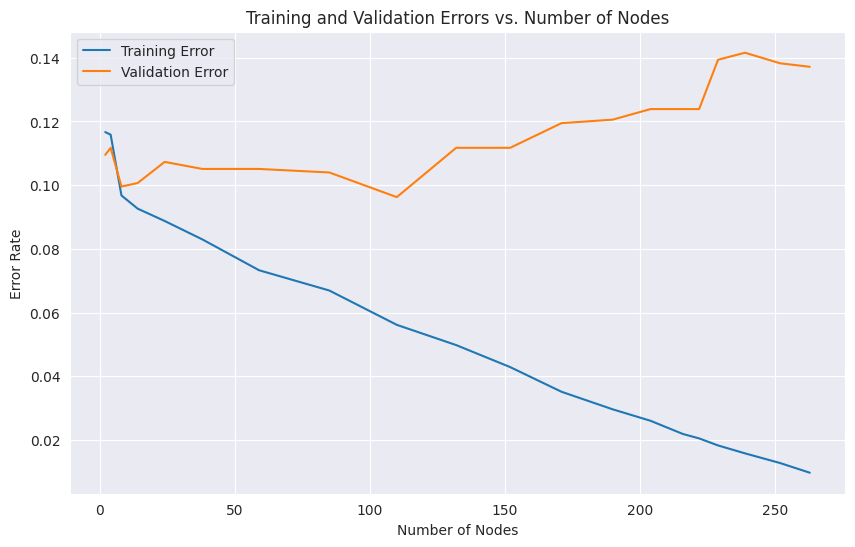

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def error_rate(y_true, y_pred):
    return np.mean(y_true != y_pred)


def train_decision_tree(X_train, y_train, max_depth):
    tree = DecisionTree(max_depth=max_depth)
    tree.fit(X_train, y_train)
    return tree


def evaluate_decision_tree(tree, X_train, y_train, X_val, y_val):
    train_pred = tree.predict(X_train)
    #print(train_pred)
    val_pred = tree.predict(X_val)
    train_err = error_rate(y_train, train_pred)
    val_err = error_rate(y_val, val_pred)
    return train_err, val_err, tree.count_nodes()

y = data.loc[:, 'y_yes']
X = data.drop(columns=['y_yes'])



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_val=y_val.astype(int)
train_errors = []
val_errors = []
node_counts = []
best_depth=0
best_err=1e9

max_depth_range = range(1, 21)


for max_depth in max_depth_range:
    # Train decision tree
    tree = train_decision_tree(X_train, y_train, max_depth)

    train_err, val_err, node_count = evaluate_decision_tree(tree, X_train, y_train, X_val, y_val)
    if(best_err>val_err):
      best_depth=max_depth
      best_err=val_err
    train_errors.append(train_err)
    val_errors.append(val_err)
    node_counts.append(node_count)

# Plotting training and validation errors against number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts, train_errors, label='Training Error')
plt.plot(node_counts, val_errors, label='Validation Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Error Rate')
plt.title('Training and Validation Errors vs. Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()

Q2

In [ ]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        self.n_classes = len(set(y))
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth:
            return np.mean(y)

        # Find the best split
        best_split = None
        best_split_loss = np.inf
        for feature_idx in range(n_features):
            feature_values = np.unique(X[:, feature_idx])
            for threshold in feature_values:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_y = y[left_indices]
                right_y = y[right_indices]

                loss = self._calculate_loss(left_y, right_y)
                if loss < best_split_loss:
                    best_split_loss = loss
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold,
                                  'left_indices': left_indices, 'right_indices': right_indices}

        if best_split is None:
            return np.mean(y)

        left_tree = self._grow_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._grow_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {'feature_idx': best_split['feature_idx'], 'threshold': best_split['threshold'],
                'left_tree': left_tree, 'right_tree': right_tree}

    def _calculate_loss(self, left_y, right_y):
        # Mean squared error as loss function
        left_loss = np.mean((left_y - np.mean(left_y))**2)
        right_loss = np.mean((right_y - np.mean(right_y))**2)
        total_loss = left_loss + right_loss
        return total_loss

    def _predict_sample(self, tree, x):
        if isinstance(tree, dict):
            if x[tree['feature_idx']] <= tree['threshold']:
                return self._predict_sample(tree['left_tree'], x)
            else:
                return self._predict_sample(tree['right_tree'], x)
        else:
            return tree

    def predict(self, X):
        return np.array([self._predict_sample(self.tree, x) for x in X])


class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, max_depth=max_depth, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []
    def fit(self, X, y):
      if isinstance(X, pd.DataFrame):
            X = X.values
      if isinstance(y, pd.Series):
            y = y.values

    # Initialize the model with the output of the first tree
      first_tree = DecisionTreeRegressor(max_depth=self.max_depth)
      first_tree.fit(X, y)
      self.trees.append(first_tree)
      initial_prediction = first_tree.predict(X)

      # Initialize residuals
      residuals = y - initial_prediction

      # Fit additional trees iteratively
      for _ in range(1, self.n_estimators):
          tree = DecisionTreeRegressor(max_depth=self.max_depth)
          tree.fit(X, residuals)
          self.trees.append(tree)

          # Update residuals
          residuals -= self.learning_rate * tree.predict(X)
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.sum(predictions, axis=0)



In [ ]:
def grid_search(X_train, y_train, X_val, y_val, learning_rates, n_estimators_values, n_splits=1):
    best_mse = np.inf
    best_params = {}

    for learning_rate in learning_rates:
        for n_estimators in n_estimators_values:
            mse_sum = 0
            for i in range(n_splits):
                model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=best_depth, learning_rate=learning_rate)
                model.fit(X_train, y_train)

                y_pred = model.predict(X_val)
                mse = np.mean((y_val - y_pred) ** 2)
                mse_sum += mse

                print(f"Learning Rate = {learning_rate}, Number of Estimators = {n_estimators}, MSE = {mse}")

            avg_mse = mse_sum / n_splits
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_params = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

    print("\nBest parameters:", best_params)
    print("Best MSE:", best_mse)


grid_search(X_train, y_train, X_val, y_val,[0.005,0.01,0.05,0.1,0.5,0.6,0.7,0.8],[10,15,20])


Learning Rate = 0.005, Number of Estimators = 10, MSE = 0.10087107049533318
Learning Rate = 0.005, Number of Estimators = 15, MSE = 0.10249202104791547
Learning Rate = 0.005, Number of Estimators = 20, MSE = 0.10383390265926051
Learning Rate = 0.01, Number of Estimators = 10, MSE = 0.10084456552790862
Learning Rate = 0.01, Number of Estimators = 15, MSE = 0.10209079399621943
Learning Rate = 0.01, Number of Estimators = 20, MSE = 0.10390846964057683
Learning Rate = 0.05, Number of Estimators = 10, MSE = 0.10072052160060754
Learning Rate = 0.05, Number of Estimators = 15, MSE = 0.10200874677239767
Learning Rate = 0.05, Number of Estimators = 20, MSE = 0.10297926519013383
Learning Rate = 0.1, Number of Estimators = 10, MSE = 0.10059321473259858
Learning Rate = 0.1, Number of Estimators = 15, MSE = 0.1011180446440036
Learning Rate = 0.1, Number of Estimators = 20, MSE = 0.10183687055344892
Learning Rate = 0.5, Number of Estimators = 10, MSE = 0.09977339224308741
Learning Rate = 0.5, Number

Here We Get the Most Relevent Learner as No. of Estimators 20 and Learning rate 0.8 as Error is minimum

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.